In [2]:

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, datasets, models
from tensorflow.keras.models import Sequential

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

print("TRAIN IMAGES: ", train_images.shape)
print("TEST IMAGES: ", test_images.shape)

TRAIN IMAGES:  (60000, 28, 28, 1)
TEST IMAGES:  (10000, 28, 28, 1)


In [4]:
num_classes = 10
img_height = 28
img_width = 28

model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

c:\Users\Anshu chaurasia\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 64)       │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,154 (422.48 KB)

 Trainable params: 108,154 (422.48 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
epochs = 10
history = model.fit(
  train_images, 
  train_labels,
  epochs = epochs
)

Epoch 1/10


c:\Users\Anshu chaurasia\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 128s 67ms/step - accuracy: 0.8885 - loss: 0.3316
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 131s 70ms/step - accuracy: 0.9847 - loss: 0.0490
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 128s 68ms/step - accuracy: 0.9895 - loss: 0.0323
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 134s 71ms/step - accuracy: 0.9914 - loss: 0.0289
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 136s 72ms/step - accuracy: 0.9936 - loss: 0.0223
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 131s 70ms/step - accuracy: 0.9945 - loss: 0.0177
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 122s 65ms/step - accuracy: 0.9958 - loss: 0.0128
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 131s 70ms/step - accuracy: 0.9957 - loss: 0.0132
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 150s 80ms/step - accuracy: 0.9970 - loss: 0.0102
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 149s 79ms/step - accuracy: 0.9964 - loss: 0.0106


Text(0.5, 1.0, 'Training Accuracy and Loss')

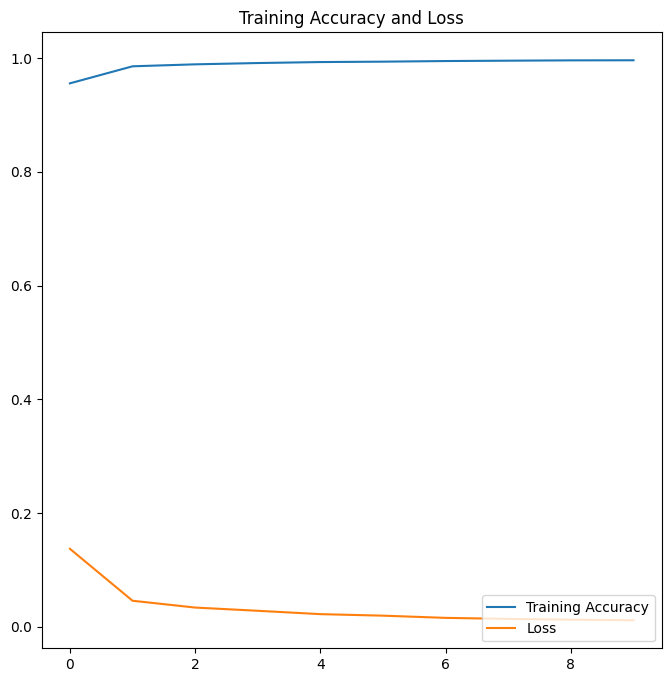

In [7]:
acc = history.history['accuracy']
loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')

Prediction of model: [1.0000000e+00 5.9874169e-06 7.3296326e-01 1.9586348e-06 1.6119882e-02
 8.9384775e-05 9.4986695e-01 1.5593790e-02 8.8096344e-01 8.4512371e-01]


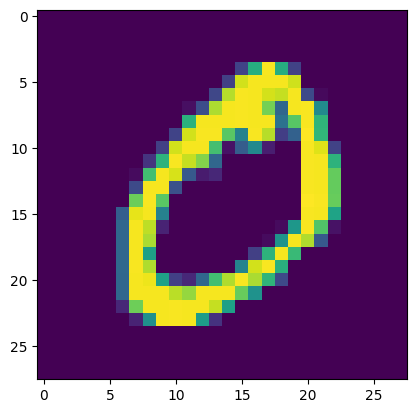

In [9]:

image = (train_images[1]).reshape(1,28,28,1)
model_pred = model.predict(image, verbose=0)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

In [10]:
model.save("new-digit-recognition-model.keras")

Prediction of model: [6.6727085e-07 3.8438805e-03 8.9132674e-03 2.1321479e-04 1.0000000e+00
 2.8723339e-04 1.4262142e-06 9.6846771e-01 3.4458585e-02 4.0795678e-01]


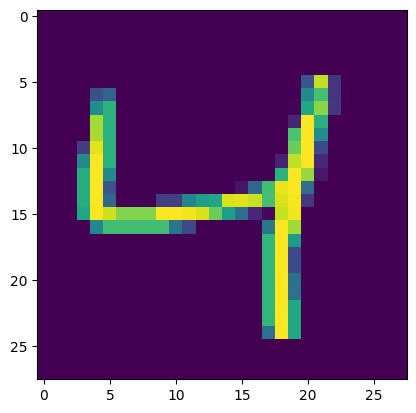

In [12]:
loaded_model = models.load_model("new-digit-recognition-model.keras")
image = (train_images[2]).reshape(1,28,28,1)
model_pred = loaded_model.predict(image, verbose=0)
plt.imshow(image.reshape(28,28))
print('Prediction of model: {}'.format(model_pred[0]))

In [15]:
# Load the image
from PIL import Image 
new_m=tf.keras.models.load_model('new-digit-recognition-model.keras')
image_path = '5.png'
img = Image.open(image_path).convert('L')  # Convert to grayscale

# Resize the image to 28x28 pixels using LANCZOS resampling
img_resized = img.resize((28, 28), Image.Resampling.LANCZOS)

# Convert the image to a numpy array
img_array = np.array(img_resized)

# Normalize the pixel values to be in the range [0, 1]
img_array = img_array.astype(np.float32) / 255.0

# Ensure the array has the shape (28, 28, 1)
img_array = np.expand_dims(img_array, axis=-1)  # (28, 28) -> (28, 28, 1)

# Add a batch dimension (1, 28, 28, 1) so the model can process it
img_array = np.expand_dims(img_array, axis=0)

# Predict the digit
prediction = new_m.predict(img_array)

# Get the predicted digit
predicted_digit = np.argmax(prediction)

# Get the probability of the predicted digit
predicted_probability = prediction[0][predicted_digit]

# Print the predicted digit and its probability
print(f'Predicted digit: {predicted_digit} with probability: {predicted_probability:.4f}')

# Optionally, print the entire probability distribution
print(f'Probability distribution: {prediction[0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted digit: 5 with probability: 0.9982
Probability distribution: [0.02294244 0.00277769 0.02899373 0.65824807 0.02394323 0.9982198
 0.13425457 0.05017269 0.19930217 0.63903743]
